In [1]:
using PyCall
unshift!(PyVector(pyimport("sys")["path"]), "");
@pyimport Compute_Jacobian_MA
@pyimport GLS_Apr_weekend_ext

In [2]:
numNodes = Compute_Jacobian_MA.numNodes;
numLinks = Compute_Jacobian_MA.numLinks;
numODpairs = Compute_Jacobian_MA.numODpairs;
numZones = Compute_Jacobian_MA.numZones
od_pairs = Compute_Jacobian_MA.od_pairs;
link_list_js = Compute_Jacobian_MA.link_list_js;
link_length_list = Compute_Jacobian_MA.link_length_list;

flow_observ = GLS_Apr_weekend_ext.x_;

In [3]:
require("../Julia_files/initia_data.jl");
require("prepare_data_MA.jl");
require("extract_data_MA.jl");
require("../Julia_files/tap_MSA.jl");
require("../Julia_files/inverseVI.jl");
require("../Julia_files/demands_adjustment_gradi.jl");

In [4]:
# demandsDict_ = readall("../08_develop_new_OD_demand_estimator_MA_Dijkstra_uni_class_Apr_weekend/results/demandsDict29.json");
# demandsDict_ = JSON.parse(demandsDict_);

In [5]:
# demandsDict_

In [6]:
# demandsDict__ = demandsDict_["32"]

# _demandsDict__ = Dict()

# for key_ in keys(demandsDict__)
#     key = (int(split(split(key_, ",")[1], "(")[2]),int(split(split(key_, ",")[2], ")")[1]))
#     _demandsDict__[key] = demandsDict__[key_]
# end

In [7]:
# _demandsDict__

In [8]:
# demandsDict[0] = _demandsDict__;
# demandsDict[1] = _demandsDict__;

In [9]:
demandsDict

Dict{Int64,Dict{(Int64,Int64),Float64}} with 2 entries:
  0 => [(6,9)=>0.0,(18,3)=>0.0,(21,13)=>0.0,(22,16)=>0.0,(15,17)=>0.0,(22,14)=>…
  1 => [(6,9)=>0.0,(18,3)=>0.0,(21,13)=>0.0,(22,16)=>0.0,(15,17)=>0.0,(22,14)=>…

In [10]:
demandsDiffDict[1] = norm(demandsDicToVec(demandsDict[1]) - demandsDicToVec(demandsDict[0]))/
                     norm(demandsDicToVec(demandsDict[0]));

In [11]:
demandsDiffDict[1]

0.0

In [12]:
weekend_Apr_list = [1, 7, 8, 14, 15, 21, 22, 28, 29]

day = 21  # day of April

21

In [13]:
# observed flow vector
xl = flow_observ[:, day]

74-element Array{Float64,1}:
 1069.47       
  821.886      
 1286.29       
 1533.87       
   99.5381     
   73.9925     
  482.609      
  260.575      
  864.537      
 1086.57       
  208.225      
  212.37       
  119.4        
    ⋮          
  740.221      
  545.195      
  413.692      
  344.281      
    5.43899e-10
    5.43899e-10
   94.6625     
   94.6625     
  653.185      
  822.96       
  859.239      
  689.464      

In [14]:
tapFlows = Dict{(Int64,Int64),Float64}()

for i = 1:length(ta_data.start_node)
    key = (ta_data.start_node[i], ta_data.end_node[i])
    tapFlows[key] = xl[i]
end

tapFlowVect = xl;

In [15]:
# get observed flow vector (corresponding to ground truth demands and ground truth costs)
tapFlowDicDict[0], tapFlowVecDict[0] = tapFlows, tapFlowVect;

In [16]:
# get arcs data corresponding to ground truth demands and flows
arcsDict[0] = observFlow("./benchmark_data/MA_net_Apr_weekend_ext.txt", tapFlowDicDict[0]);

In [17]:
arcsDict[0]

Dict{(Int64,Int64),Arc} with 74 entries:
  (17,15) => Arc(17,15,5941.509547,0.243392,822.9599619721723)
  (3,6)   => Arc(3,6,6438.424264,0.117963,864.5373015750429)
  (21,13) => Arc(21,13,2068.636909,0.103075,301.1029667129198)
  (22,16) => Arc(22,16,5826.794762,0.118731,5.438987823952629e-10)
  (19,12) => Arc(19,12,5540.728327,0.069605,171.69156960443183)
  (22,14) => Arc(22,14,4285.78757,0.079134,94.6625069078315)
  (15,17) => Arc(15,17,5726.051257,0.245197,653.1852219799919)
  (10,11) => Arc(10,11,2934.51529,0.211194,507.16466419361603)
  (13,12) => Arc(13,12,918.190114,0.474671,1.0120739549067401e-13)
  (3,1)   => Arc(3,1,8000.0,0.179745,1533.8713316973142)
  (16,13) => Arc(16,13,5859.480324,0.169855,545.194989091963)
  (4,5)   => Arc(4,5,6000.0,0.043136,720.0459623709298)
  (13,16) => Arc(13,16,5396.837063,0.158994,740.2210641798455)
  (17,16) => Arc(17,16,5877.602649,0.208304,689.4644472180155)
  (20,13) => Arc(20,13,2251.546038,0.137259,279.5823134995158)
  (12,8)  => Arc(12,8,6

In [18]:
deg = 6
c = 0.5
lam = 10000.0

coeffs_dict_Apr_PM_ = readall("../temp_files/coeffs_dict_Apr_weekend.json")
coeffs_dict_Apr_PM_ = JSON.parse(coeffs_dict_Apr_PM_)
fcoeffs = coeffs_dict_Apr_PM_["($(deg),$(c),$(lam),1)"]

7-element Array{Any,1}:
  1.0       
  0.00268857
  0.0114664 
 -0.00834401
  0.0234205 
 -0.0137301 
  0.00429399

INFO: Loading help data...


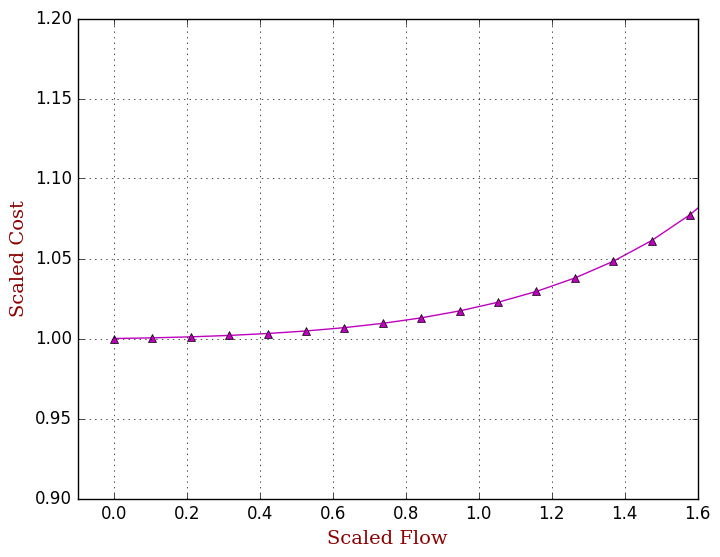

In [19]:
using PyPlot

est_coeffs = fcoeffs

xs = linspace(0, 2, 20)

zs = map(x->polyEval(est_coeffs, x), xs)

plot(xs, zs, "^-m")

grid("on")
xlim(-0.1, 1.6);
ylim(0.9, 1.2);

font1 = ["family"=>"serif","color"=>"darkred","weight"=>"normal","size"=>14]
xlabel("Scaled Flow", fontdict=font1)
ylabel("Scaled Cost", fontdict=font1)

savefig("./results/fitting_MA.pdf")

In [20]:
demandsVecDict[1] = demandsDicToVec(demandsDict[1]);
objFunDict[1] = objF(demandsVecDict[1], fcoeffs);

In [21]:
# get initial flow vector (corresponding to initial demands)
tapFlowDicDict[1], tapFlowVecDict[1] = tapMSA(demandsDict[1], fcoeffs);

demandsVecDict[0] = demandsDicToVec(demandsDict[0]);

In [22]:
# get arcs data corresponding to initial demands and flows
arcsDict[1] = observFlow("./benchmark_data/MA_net_Apr_weekend_ext.txt", tapFlowDicDict[1]);

In [23]:
linkCostDicDict[1] = tapFlowVecToLinkCostDict(tapFlowVecDict[1], fcoeffs);

In [24]:
linkCostDicDict[1]["0"], link_length_list[1]

(0.1626805575171639,0.0)

In [25]:
jacobiSpiessDict[1] = Compute_Jacobian_MA.jacobianSpiess(numNodes, numLinks, numODpairs, od_pairs, 
                                              link_list_js, [linkCostDicDict[1]["$(i)"] for i=0:numLinks-1]);

In [26]:
# maximum number of iterations
N = 100;  

# Armijo rule parameters
rho = 2;
M = 10;

# search direction parameter
epsilon_1 = 0;

# stop criterion parameter
epsilon_2 = 1e-20;

In [27]:
for l = 1:N
    
    jacobDict[l] = jacobiSpiessDict[l]

    descDirecDict[l] = descDirec(tapFlowVecDict[l], tapFlowVecDict[0], jacobDict[l], numODpairs, numLinks);

    demandsVecDict[l] = demandsDicToVec(demandsDict[l]);

    searchDirecDict[l] = searchDirec(demandsVecDict[l], descDirecDict[l], epsilon_1);

    thetaMaxDict[l] = thetaMax(demandsVecDict[l], searchDirecDict[l]);

    demandsVecDict[l+1] = similar(demandsVecDict[0]);
    
    demandsVecDict[l+1], objFunDict[l+1] = armijo(objFunDict[l], demandsVecDict[l], fcoeffs, searchDirecDict[l], 
    thetaMaxDict[l], rho, M);
            
    demandsDict[l+1] = demandsVecToDic(demandsVecDict[l+1]);
    
    tapFlowDicDict[l+1], tapFlowVecDict[l+1] = tapMSA(demandsDict[l+1], fcoeffs);
        
    arcsDict[l+1] = observFlow("./benchmark_data/MA_net_Apr_weekend_ext.txt", tapFlowDicDict[l+1]);
        
    linkCostDicDict[l+1] = tapFlowVecToLinkCostDict(tapFlowVecDict[l+1], fcoeffs);
    
    jacobiSpiessDict[l+1] = Compute_Jacobian_MA.jacobianSpiess(numNodes, numLinks, numODpairs, od_pairs, 
                                              link_list_js, [linkCostDicDict[l+1]["$(i)"] for i=0:numLinks-1]);
        
    demandsDiffDict[l+1] = norm(demandsVecDict[l+1] - demandsVecDict[0]) / norm(demandsVecDict[0]);
    
    # stopping criterion
    if (objFunDict[l] - objFunDict[l+1]) / objFunDict[1] < epsilon_2
        break
    end
  
end

# normalize objective function value
for l = 1:(length(objFunDict))
    norObjFunDict[l] = objFunDict[l] / objFunDict[1];
end

In [28]:
demandsVecDict

Dict{Any,Any} with 36 entries:
  18 => [7.311468217346442,90.60128971942538,283.48508722000554,0.0,140.1213195…
  30 => [24.014497556263912,157.45903653574044,286.77463668872264,0.0,226.62093…
  33 => [30.42842444962779,185.59218749188042,287.6605572614476,0.0,259.5233784…
  32 => [30.01918410146621,183.5143843598735,287.697391386842,0.0,257.198609955…
  2  => [0.0,8.194298015027659,337.3282562795663,0.0,13.701816020439942,249.025…
  16 => [2.3346301173138486,63.59802026508389,286.30231551879086,0.0,100.738460…
  11 => [1.3172303532024836,57.386738338186035,287.21803840946586,0.0,91.532588…
  21 => [9.035553930184856,97.84952603208937,283.5691903286047,0.0,150.07212547…
  0  => [0.0,0.0,364.030563,0.0,0.0,325.36421,0.0,0.0,0.0,0.0,387.087581,543.74…
  7  => [0.0,40.2615052568024,292.75244573135853,0.0,65.37479887670393,112.4266…
  9  => [0.17494395115611983,44.358976185564345,291.1466667115626,0.0,71.695602…
  10 => [0.7481637894123571,52.97057613798462,288.18401998547415,0.0,84.891905

In [29]:
norObjFunDict

Dict{Any,Any} with 35 entries:
  18 => 0.075540515470487
  30 => 0.041430058000432986
  33 => 0.033454979210230565
  32 => 0.03396102987065877
  2  => 0.5447976911838329
  16 => 0.10631448463447862
  11 => 0.11569363037541387
  21 => 0.07020040221124436
  7  => 0.15506699353233494
  9  => 0.1433318665302314
  25 => 0.06116534376639228
  10 => 0.1237098762752361
  26 => 0.05950452123942709
  29 => 0.04170258474162979
  34 => 0.03310976588007801
  35 => 0.03310976588007801
  19 => 0.07520710618531318
  17 => 0.07848327508576693
  8  => 0.14762277447227948
  22 => 0.06428484003431861
  6  => 0.1892017099051828
  24 => 0.061993747351542214
  4  => 0.3862296227588404
  3  => 0.436889933930162
  28 => 0.04539929631952794
  ⋮  => ⋮

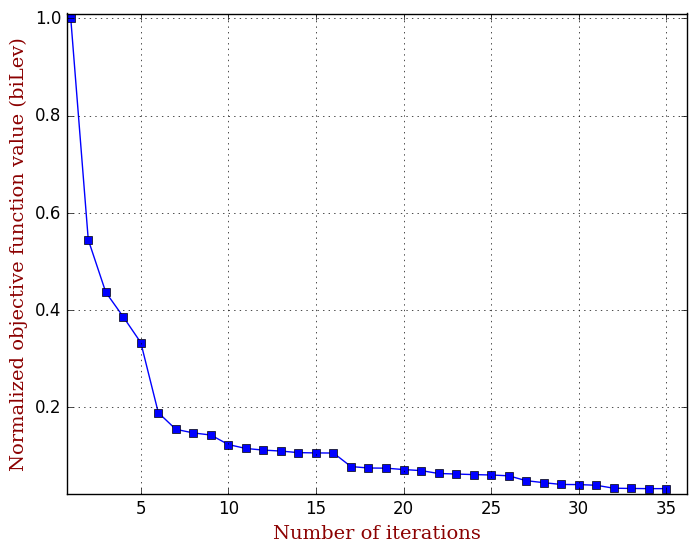

In [30]:
using PyPlot

iterNum = 1:(length(norObjFunDict))

objFun = map(iterNum->norObjFunDict[iterNum], iterNum)

# plot(iterNum, objFun, "s-g", label="True")

plot(iterNum, objFun, "s-b")

# legend(loc="upper right",fancybox="true") 

grid("on")

xlim(.8, length(norObjFunDict) + 1 + .2)
ylim(minimum(objFun)-.01, maximum(objFun)+.01)

font1 = ["family"=>"serif", "color"=>"darkred", "weight"=>"normal", "size"=>14]

xlabel("Number of iterations", fontdict=font1)
ylabel("Normalized objective function value (biLev)", fontdict=font1)

savefig("./results/objFun_biLev_MA.pdf")

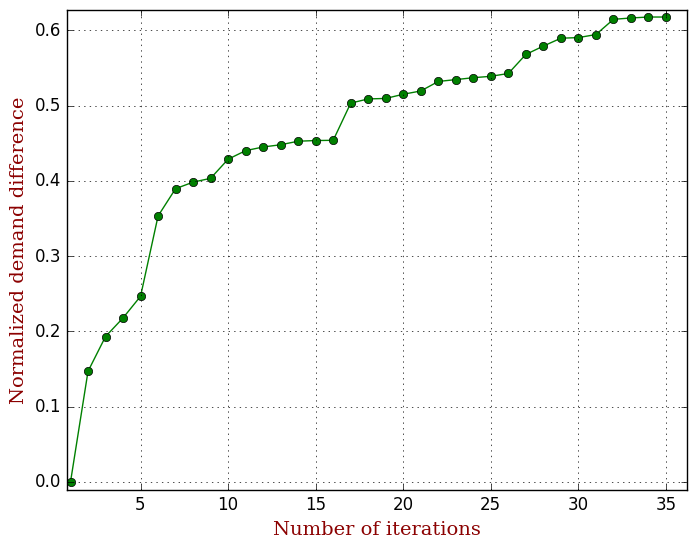

In [31]:
using PyPlot

iterNum = 1:(length(demandsDiffDict))

demandsDiff = map(iterNum->demandsDiffDict[iterNum], iterNum)

# plot(iterNum, objFun, "s-g", label="True")

plot(iterNum, demandsDiff, "o-g")

# legend(loc="upper right",fancybox="true") 

grid("on")

xlim(.8, length(demandsDiffDict) + 1 + .2)
ylim(minimum(demandsDiff)-.01, maximum(demandsDiff)+.01)

font1 = ["family"=>"serif", "color"=>"darkred", "weight"=>"normal", "size"=>14]

xlabel("Number of iterations", fontdict=font1)
ylabel("Normalized demand difference", fontdict=font1)

savefig("./results/demandsDiff_biLev_MA.pdf")

In [32]:
outfile = open("./results/norObjFunDict.json", "w")

JSON.print(outfile, norObjFunDict)

close(outfile)

In [33]:
outfile = open("./results/demandsDiffDict.json", "w")

JSON.print(outfile, demandsDiffDict)

close(outfile)

In [34]:
outfile = open("./results/demandsVecDict.json", "w")

JSON.print(outfile, demandsVecDict)

close(outfile)

In [35]:
outfile = open("./results/demandsDict$(day).json", "w")

JSON.print(outfile, demandsDict)

close(outfile)

In [36]:
outfile = open("./results/tapFlowDicDict.json", "w")

JSON.print(outfile, tapFlowDicDict)

close(outfile)

In [37]:
outfile = open("./results/tapFlowVecDict.json", "w")

JSON.print(outfile, tapFlowVecDict)

close(outfile)

In [38]:
demandsDict[length(demandsDict)-1]

Dict{(Int64,Int64),Float64} with 484 entries:
  (6,9)   => 0.0
  (18,3)  => 69.3108653666335
  (21,13) => 25.026027553766745
  (22,16) => 0.0
  (15,17) => 48.39824550430607
  (22,14) => 0.0
  (13,9)  => 28.067846512376107
  (8,9)   => 9.269549717518359
  (9,1)   => 0.0
  (17,14) => 0.0
  (16,6)  => 0.0
  (16,12) => 2.220446049250313e-16
  (16,13) => 622.328013845495
  (22,2)  => 0.0
  (7,16)  => 290.6455852073845
  (1,12)  => 274.9371892712117
  (4,5)   => 0.0
  (11,8)  => 103.83005382836083
  (18,21) => 0.0
  (19,4)  => 0.0
  (20,13) => 20.005449140574704
  (15,4)  => 32.040048059077016
  (6,18)  => 26.202210606435763
  (5,16)  => 0.0
  (4,9)   => 0.0
  ⋮       => ⋮

In [61]:
demandsDict_ = Dict{}()

for key in keys(demandsDict[length(demandsDict)-1])
    demandsDict_[key] = demandsDict[length(demandsDict)-1][key] * 0.68
end

In [62]:
# weekend_Apr_list = [1, 7, 8, 14, 15, 21, 22, 28, 29]
day = 7

outfile = open("./results/demandsDictFixed$(day).json", "w")

JSON.print(outfile, demandsDict_)

close(outfile)